# Used Cars Price Prediction

## Introduction

In this project, we will explore a dataset containing information about used cars, with the goal of predicting their prices. The dataset consists of one dependent variable (Price) and seven independent variables. With this dataset, we have the opportunity to perform various data cleaning and preprocessing tasks, as well as build predictive models to accurately estimate the prices of used cars.

-  *The dataset includes the following columns:*
    - **Price:** This is the target variable that we aim to predict. It represents the price of the used cars.
    - **Year:** The year in which the car was purchased.
    - **Mileage:** The number of kilometers driven by the car.
    - **City:** The city in which the car was sold.
    - **State:** The state in which the car was sold.
    - **Vin:** A unique identifier for each car.
    - **Make:** The manufacturer of the car.
    - **Model:** The specific model or name of the car.

- *Project Objectives:*

Our primary objective is to build predictive models that can accurately predict the prices of used cars based on the given independent variables. To achieve this objective, we will:

    - Perform exploratory data analysis (EDA) to gain insights into the distribution and relationships of the variables in the dataset.
    - Clean and preprocess the dataset by handling missing values, outliers, and categorical variables.
    - Engineer new features if necessary to improve model performance.
    - Select appropriate machine learning algorithms and techniques for modeling the data.
    - Train and evaluate multiple models to identify the best-performing one.
    - Fine-tune the selected model and validate its performance using suitable evaluation metrics.

## Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("true_car_listings.csv")
df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


In [3]:
df.duplicated().sum()

30

In [4]:
df = df[df.duplicated() == False]
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852092 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852092 non-null  int64 
 1   Year     852092 non-null  int64 
 2   Mileage  852092 non-null  int64 
 3   City     852092 non-null  object
 4   State    852092 non-null  object
 5   Vin      852092 non-null  object
 6   Make     852092 non-null  object
 7   Model    852092 non-null  object
dtypes: int64(3), object(5)
memory usage: 58.5+ MB


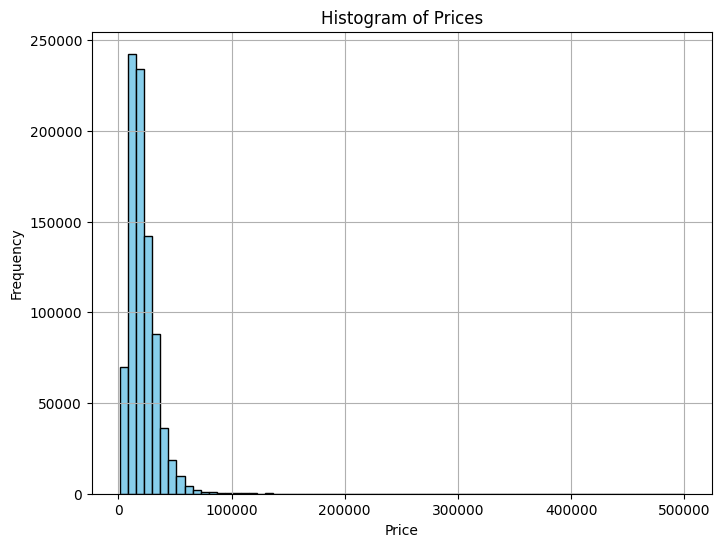

In [6]:
plt.figure(figsize=(8, 6)) 
plt.hist(df['Price'], bins=70, color='skyblue', edgecolor='black') 
plt.title('Histogram of Prices')  
plt.xlabel('Price') 
plt.ylabel('Frequency') 
plt.grid(True)  
plt.show()

The distribution of the `Price` column is **Right-Skewed**.

<AxesSubplot: xlabel='Make'>

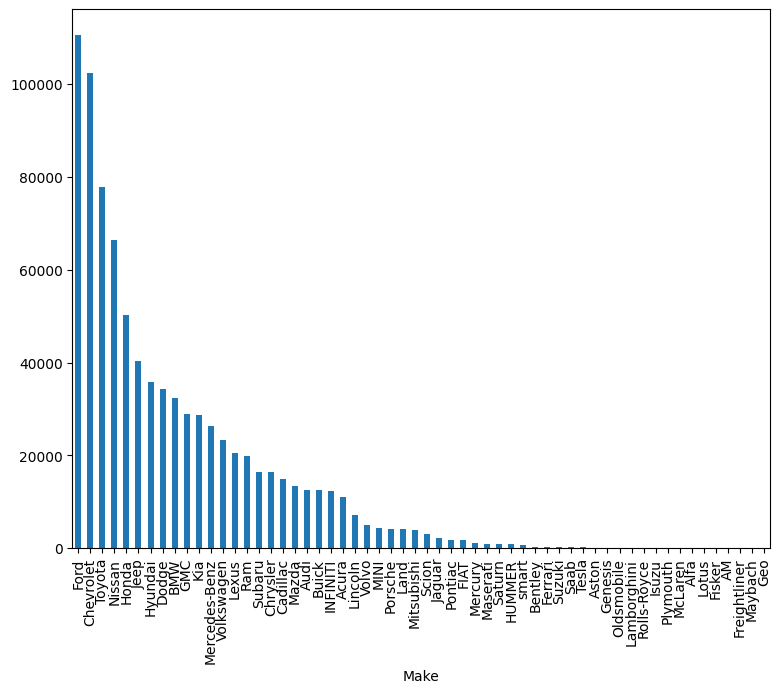

In [7]:
plt.figure(figsize=(9, 7)) 
df.Make.value_counts().plot(kind='bar')

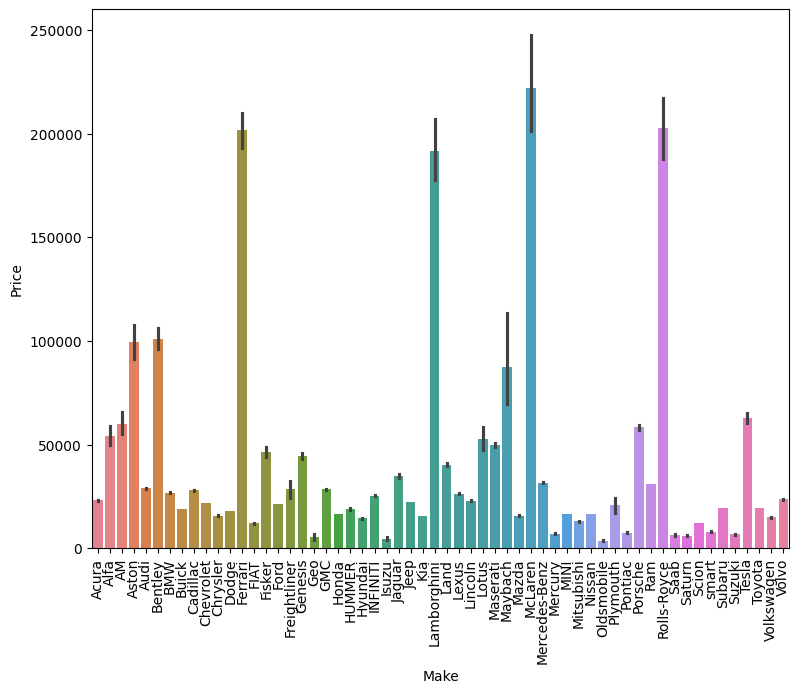

In [8]:
plt.figure(figsize=(9, 7)) 
sns.barplot(x = df['Make'], y = df['Price'],palette='husl')
plt.xticks(rotation='vertical')
plt.show()

In [9]:
model_df = pd.DataFrame(df['Model'].value_counts().items(), columns=['Model', 'Count'])
model_df

,Model,Count
0,Silverado,24929
1,Grand,17321
2,Accord,14502
3,F-1504WD,14177
4,Altima2.5,11288
...,...,...
2731,EdgeLTD,1
2732,ExpeditionEddie,1
2733,EscortSE,1
2734,Ranger,1


In [10]:
# plt.figure(figsize=(8, 6)) 
# plt.hist(model_df['Count'], bins=70, color='skyblue', edgecolor='black') 
# plt.title('Histogram of Model\'s Count')  
# plt.xlabel('Model\'s Value Counts') 
# plt.ylabel('Count') 
# plt.grid(True)  
# plt.show()

In [11]:
# plt.figure(figsize=(10, 8)) 
# model_dict = df['Model'].value_counts().to_dict()
# pd.DataFrame(df['Model'].apply(lambda x: x if model_dict[x] >= 5000 else 'Other'), columns=['Model']).Model.value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Year'>

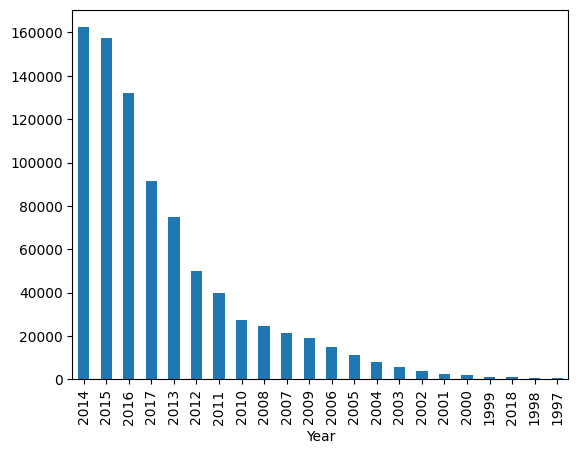

In [12]:
df.Year.value_counts().plot(kind='bar')

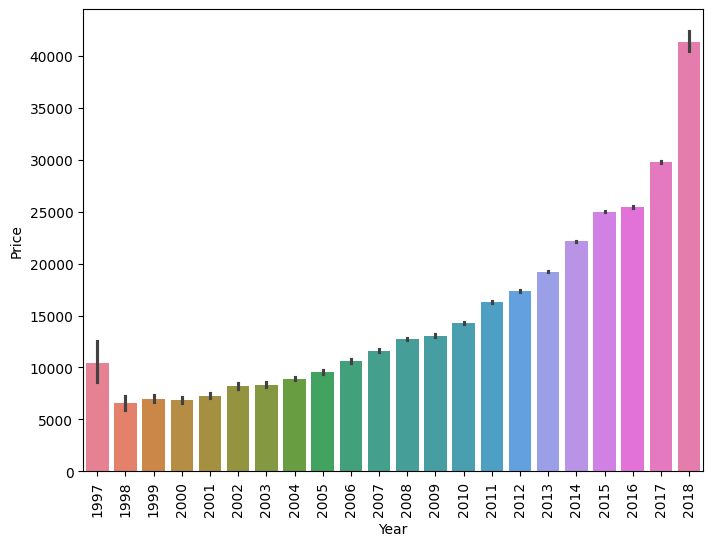

In [13]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x = df['Year'], y = df['Price'],palette='husl')
plt.xticks(rotation='vertical')
plt.show()

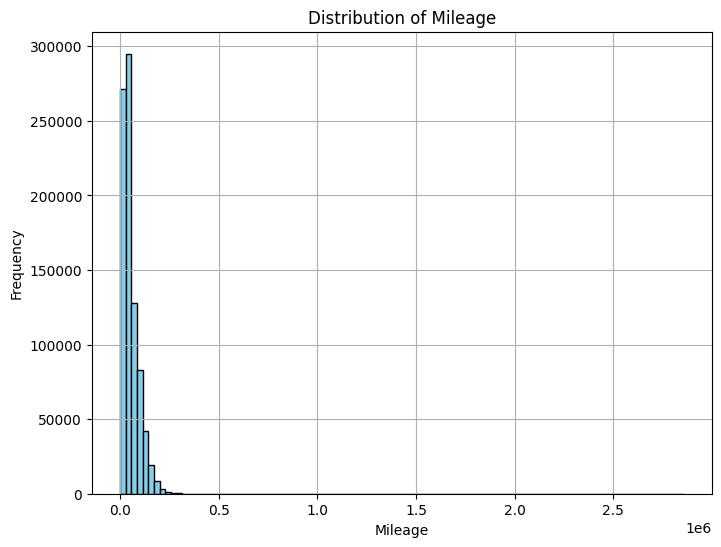

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(df['Mileage'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Mileage')
plt.grid(True)
plt.show()

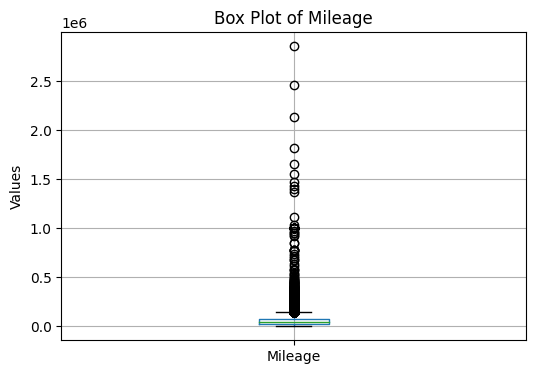

In [15]:
plt.figure(figsize=(6, 4))
df.boxplot(column='Mileage')
plt.title('Box Plot of Mileage')
plt.ylabel('Values')
plt.show()

In [16]:
def Mileage_transform(Mileage):
    split = [i for i in range(0,500_001,10_000)] + [1_500_000]
    for i in range(len(split)-1):
        if Mileage >= split[i] and Mileage < split[i+1]:
            return f'{split[i]} - {split[i+1]}'
    return '>= 1500000'
mileage_df = pd.DataFrame(df['Mileage'].apply(Mileage_transform))
mileage_df.head()

,Mileage
0,30000 - 40000
1,10000 - 20000
2,40000 - 50000
3,30000 - 40000
4,20000 - 30000


<AxesSubplot: xlabel='Mileage'>

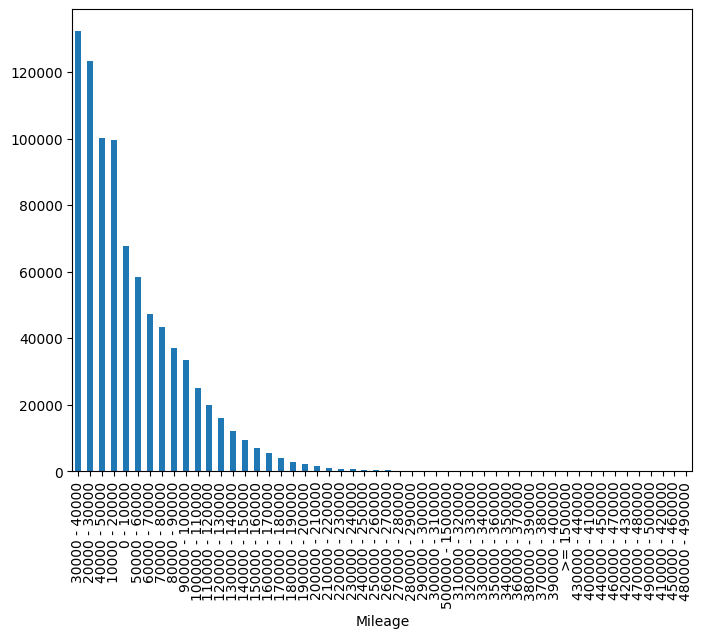

In [17]:
plt.figure(figsize=(8, 6))
mileage_df.Mileage.value_counts().plot(kind='bar')

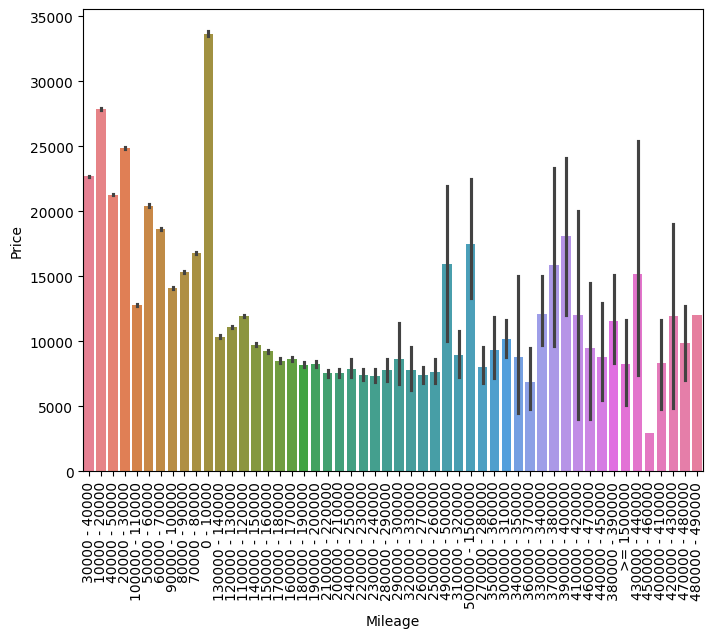

In [18]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x = mileage_df['Mileage'], y = df['Price'],palette='husl')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot: xlabel='State'>

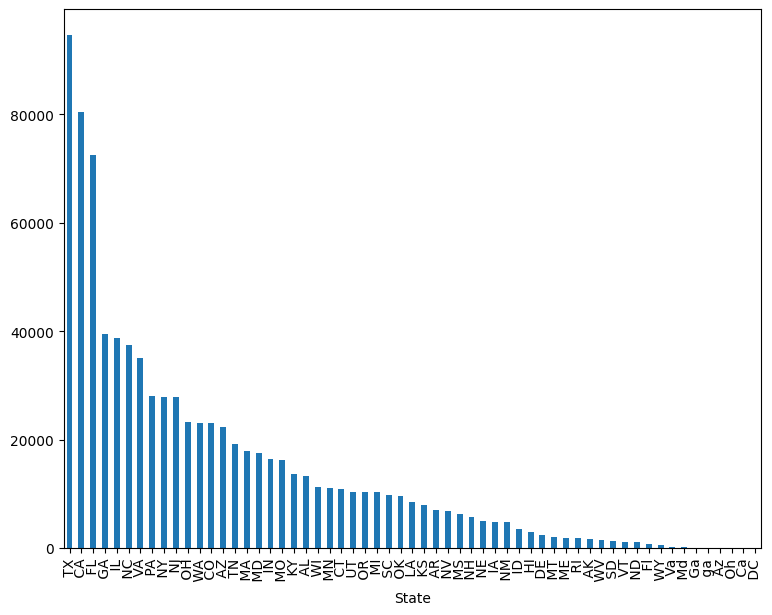

In [19]:
plt.figure(figsize=(9, 7)) 
df.State.value_counts().plot(kind='bar')

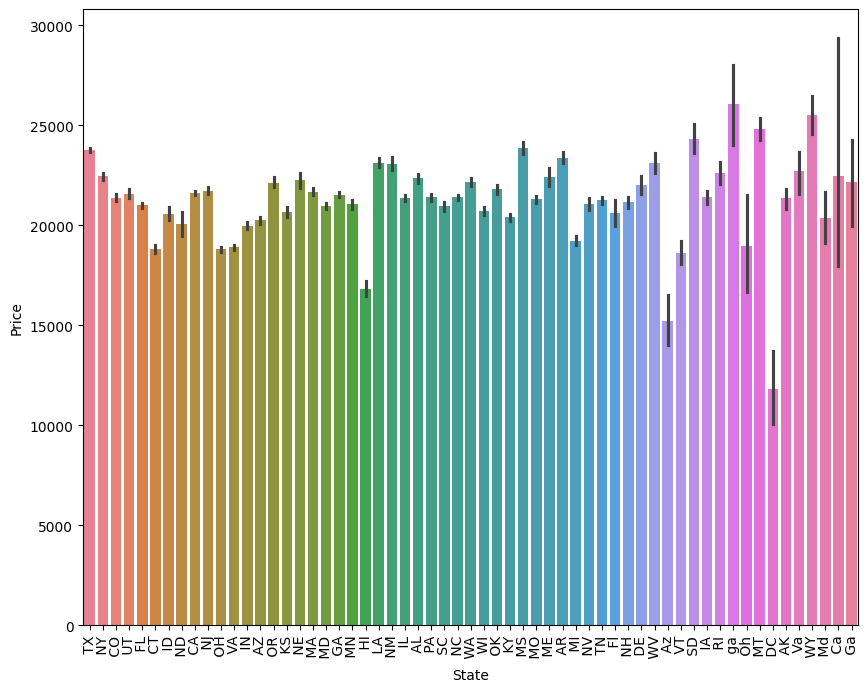

In [20]:
plt.figure(figsize=(10, 8)) 
sns.barplot(x = df['State'], y = df['Price'],palette='husl')
plt.xticks(rotation='vertical')
plt.show()

In [21]:
data = df
data = data.drop(columns=['Vin','City','Model','Mileage'])
data = data.join(mileage_df)
data

,Price,Year,State,Make,Mileage
0,8995,2014,TX,Acura,30000 - 40000
1,10888,2013,NY,Acura,10000 - 20000
2,8995,2013,TX,Acura,40000 - 50000
3,10999,2014,CO,Acura,30000 - 40000
4,14799,2016,UT,Acura,20000 - 30000
...,...,...,...,...,...
852117,63215,2017,CA,Volvo,0 - 10000
852118,72260,2017,NJ,Volvo,0 - 10000
852119,55999,2016,CO,Volvo,20000 - 30000
852120,60240,2017,CA,Volvo,0 - 10000


In [70]:
data_dummies = pd.get_dummies(data, columns=['Year','State', 'Make', 'Mileage'], drop_first=True).astype(int)
data_dummies.head()

,Price,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,...,Mileage_470000 - 480000,Mileage_480000 - 490000,Mileage_490000 - 500000,Mileage_50000 - 60000,Mileage_500000 - 1500000,Mileage_60000 - 70000,Mileage_70000 - 80000,Mileage_80000 - 90000,Mileage_90000 - 100000,Mileage_>= 1500000
0,8995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10888,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14799,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning Algorithms

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [87]:
X = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [88]:
X_sampled, X_unused, y_sampled, y_unused = train_test_split(X, y, train_size=50_000, random_state=42)

In [89]:
X_sampled.head()

,Year,State,Make,Mileage
683357,2014,MA,Nissan,50000 - 60000
384830,2015,FL,Honda,30000 - 40000
335288,1998,SC,Ford,130000 - 140000
831785,2013,MD,Volkswagen,70000 - 80000
849772,2017,CA,Volvo,30000 - 40000


In [90]:
y_sampled.head()

683357    10.038674
384830     9.721666
335288     8.292799
831785     9.259131
849772    10.328886
Name: Price, dtype: float64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

In [92]:
X_train.head()

,Year,State,Make,Mileage
225840,2013,WA,Dodge,70000 - 80000
775522,2014,AL,Toyota,20000 - 30000
372312,2015,OK,GMC,30000 - 40000
239042,2016,GA,FIAT,0 - 10000
207499,2014,FL,Dodge,30000 - 40000


In [93]:
X_test.head()

,Year,State,Make,Mileage
74474,2014,NJ,Cadillac,40000 - 50000
845326,2015,IL,Volkswagen,0 - 10000
87524,2017,TX,Chevrolet,30000 - 40000
200861,2010,GA,Chrysler,170000 - 180000
117450,2015,OK,Chevrolet,20000 - 30000


In [94]:
y_train.head()

225840     9.740380
775522     9.902937
372312    10.671487
239042     9.769956
207499     9.366232
Name: Price, dtype: float64

In [95]:
y_test.head()

74474     10.126631
845326     9.998525
87524      9.725138
200861     9.210340
117450    10.020826
Name: Price, dtype: float64

In [96]:
categorical_features = ['Year', 'Mileage', 'State', 'Make']

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first',handle_unknown='ignore')) 
])

preprocessor = ColumnTransformer([
    ('categorical', categorical_pipeline, categorical_features)
], remainder='passthrough') 

### LinearRegression

In [97]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print ('R2 score', r2_score(y_test, y_pred))
print ('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.6094276030229135
MAE 0.2737376274997168


### DecisionTreeRegressor

In [98]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print ('R2 score', r2_score(y_test, y_pred))
print ('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.41524979577729737
MAE 0.31934213117639904


### RandomForestRegressor

In [99]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100,
                                        random_state=3,
                                        max_samples=0.5,
                                        max_features=0.75,
                                        max_depth=15))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print ('R2 score', r2_score(y_test, y_pred))
print ('MAE', mean_absolute_error(y_test, y_pred))

R2 score 0.5193380464984121
MAE 0.2995818265426566
